In [78]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [3]:
data_1 = ('amazon_cells_labelled.txt')
data_2 = ('yelp_labelled.txt')
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

txt_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
positive = (txt_raw['score'] == 1)
txt_raw[positive]

,sentence,score
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [5]:
keywords = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

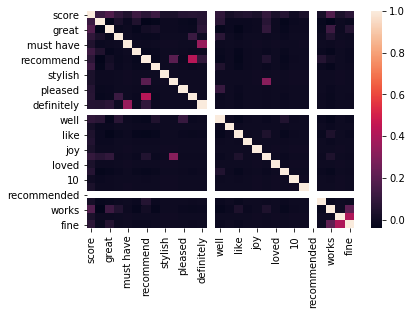

In [6]:
sns.heatmap(txt_raw.corr())

In [7]:
data = txt_raw[keywords]
target = positive

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 336
Accuracy : 66.4%


### Adding a confusion matrix for the first dataset

In [51]:
confusion_matrix(target,y_pred)

array([[464,  36],
       [300, 200]])

In [66]:
# Build your confusion matrix and calculate sensitivity and specificity here.

    
def evaluate(dataframe, target, predicted):
    hits = (target == predicted).sum()
    misses = (target != predicted).sum()
    accuracy = (hits / dataframe.shape[0]) * 100
    
    """Manually create confusion matrix by comparing predictions with answers."""
    # initialize counts
    TP = 0 # Positive review (1) predicted as Positive
    TN = 0 # Negative review (0) predicted as Negative
    FP = 0 # Negative review (0) predicted as Positive (1)
    FN = 0 # Positive review (1) predicted as Negative (0)
    
    x = 0
    while x < len(target):
        if target[x] == 0 and predicted[x] == 0:  # True Negative
            TN += 1
        if target[x] == 0 and predicted[x] == 1:  # False Positive
            FP += 1
        if target[x] == 1 and predicted[x] == 1:  # True Positive
            TP += 1
        if target[x] == 1 and predicted[x] == 0:  # False Negative
            FN += 1
        x += 1
    
    # make confusion matrix from counts
    cm = [[TP, FN],[FP, TN]]
    
    con_mat = np.array([['','Positive','Negative'], #columns are predictions
                ['Positive',TP,FN], 
                ['Negative',FP,TN]])
                
    df_confusion = pd.DataFrame(data=con_mat[1:,1:],
                                index=con_mat[1:,0],
                                columns=con_mat[0,1:])

    """Manually calculate sensetivity and specificity"""
    # calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    
    # Display evaluation metrics with output dictionary
    output = {'':df_confusion,
              'Total datapoints (n)':dataframe.shape[0],
              'Mislabeled Points':misses,
              'Accuracy':accuracy,
              'Type I':FP,
              'Type II':FN,
              'Sensitivity':sensitivity,
              'Specificity':specificity}
    
    return output

In [67]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      200      300
 Negative       36      464,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 336,
 'Accuracy': 66.4,
 'Type I': 36,
 'Type II': 300,
 'Sensitivity': 0.4,
 'Specificity': 0.928}

### Cross validation to check for accuracy across multiple test groups

In [46]:
# Cross validation using sklearn
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.7 , 0.65, 0.65, 0.66, 0.69, 0.6 , 0.69, 0.63, 0.67, 0.61])

#### Some features are causing a lot of variation so I'll do some modifications

## 2. Modify and run model a second time

In [59]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

### Clean the text data and re-run model

In [62]:
# Remove punctuation and non-alphanumeric characters, then lowercase all text
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('-',' ', str(x))) # separate hyphenated words
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('[^\w\s\d]','', str(x))) # strip non-alphanumeric characters
txt_raw['sentence'] = txt_raw['sentence'].str.lower() # convert all to lowercase

In [63]:
#Keeping the same keywords
keywords2 = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

#adding more regex to find the keywords
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [74]:
positive = (txt_raw['score'] == 1)

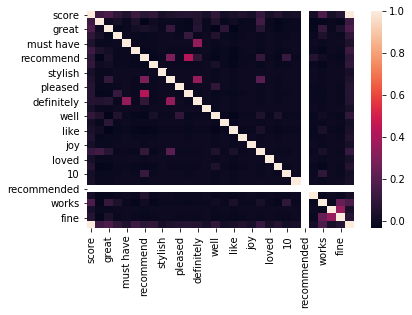

In [71]:
sns.heatmap(txt_raw.corr())

In [75]:
data = txt_raw[keywords]
target = positive

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [73]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      193      307
 Negative       33      467,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 340,
 'Accuracy': 66.0,
 'Type I': 33,
 'Type II': 307,
 'Sensitivity': 0.386,
 'Specificity': 0.934}

In [76]:
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.66, 0.66, 0.64, 0.68, 0.6 , 0.67, 0.64, 0.68, 0.6 ])

> With simple text cleaning, this second run actually performed worse on the positive reviews, but improved the detection of negative reviews both by small amounts.

> The cross validation scores show that the variance is slightly more consistent

## 3. Modify and run model a third time

In [79]:
# create a dataframe containing counts of each word in both positive and negative reviews
words = pd.DataFrame()

# Create a list of all unique words
all_words = []
for rev in txt_raw['sentence']:
    for word in rev.split():
        all_words.append(word)        
all_words = set(all_words)

# Retrieve counts of each word for positive reviews
pos_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 1]:
    for word in rev.split():
        pos_words.append(word)   
pos_counts = Counter(pos_words)

# Retrieve counts of each word for negative reviews
neg_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 0]:
    for word in rev.split():
        neg_words.append(word)         
neg_counts = Counter(neg_words)

In [80]:
# Create a dataframe summarizing words by their frequencies in each type of review
words['word'] = list(all_words)
words = words.set_index('word')

words['pos_count'] = 0
for word in words.index:
    if word in pos_counts:
        words.at[word, 'pos_count'] = pos_counts[word]

words['neg_count'] = 0
for word in words.index:
    if word in neg_counts:
        words.at[word, 'neg_count'] = neg_counts[word]

words['total_count'] = words['pos_count'] + words['neg_count']
        
words['is_positive'] = 0
words.loc[words['neg_count'] < words['pos_count'], 'is_positive'] = 1

words['delta'] = abs(words['pos_count'] - words['neg_count'])

words['scaled_delta'] = words['delta'] / words['total_count']

#### Dataframe of unique words summary

> Trying to find the most popular words and see if using them in my keyword list will make the model better

In [81]:
words

,pos_count,neg_count,total_count,is_positive,delta,scaled_delta
word,,,,,,
seen,1,0,1,1,1,1.000000
date,1,1,2,0,0,0.000000
lot,7,2,9,1,5,0.555556
plans,0,1,1,0,1,1.000000
fourth,0,1,1,0,1,1.000000
6,0,2,2,0,2,1.000000
unintelligible,0,1,1,0,1,1.000000
numbers,0,1,1,0,1,1.000000
sharp,3,0,3,1,3,1.000000


In [83]:
words.describe()

,pos_count,neg_count,total_count,is_positive,delta,scaled_delta
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.00000
mean,2.606428,2.783983,5.390411,0.412013,2.092202,0.79774
std,11.371315,11.356945,22.155245,0.492327,4.622882,0.34708
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.60000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000
75%,1.000000,2.000000,3.000000,1.000000,2.000000,1.00000
max,237.000000,277.000000,514.000000,1.000000,87.000000,1.00000


In [95]:
all_words.value_counts()

AttributeError: 'set' object has no attribute 'value_counts'

In [82]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

positive = (txt_raw['score'] == 1)

In [87]:
keywords3 = []
keywords3 = list(words.loc[((words['pos_count']) > (words['neg_count'])) & (words['total_count'] > 5) & 
                           (words['scaled_delta'] > .8)].index)

print(keywords3)

['excellent', 'works', 'perfectly', 'fine', 'great', 'nice', 'best', 'love', 'price', 'fits']


In [ ]:
#Keeping the same keywords
keywords2 = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

#adding more regex to find the keywords
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )